# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Zhafran An-Nawawi
- **Email:** zhafran.annawawi@gmail.com
- **ID Dicoding:** MS113D5Y0542

## Menentukan Pertanyaan Bisnis

## Pertanyaan 1
- Bagaimana tren pembelian pelanggan dalam enam bulan terakhir berdasarkan kategori produk?

## Pertanyaan 2
- Apakah ada pola dalam kategori produk yang dibeli oleh pelanggan one-time buyer?

## Import Semua Packages/Library yang Digunakan

In [124]:
# Import library utama
import pandas as pd  # Manipulasi data
import numpy as np  # Operasi numerik
import matplotlib.pyplot as plt  # Visualisasi dasar
import seaborn as sns  # Visualisasi lebih keren

# Library tambahan untuk analisis lebih dalam
import datetime as dt  # Untuk manipulasi tanggal
from scipy import stats  # Untuk analisis statistik
from sklearn.cluster import KMeans  # Untuk clustering
from sklearn.preprocessing import StandardScaler  # Normalisasi data

# Konfigurasi visualisasi
sns.set(style="whitegrid")
plt.style.use("ggplot")

## Data Wrangling

### Gathering Data

In [102]:
# Import dataset yang diperlukan
customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")

# Cek apakah dataset berhasil dimuat
print("=" * 50)
print("Preview Dataset Orders")
print("=" * 50)
print(orders.head(), "\n")

print("=" * 50)
print("Preview Dataset Order Items")
print("=" * 50)
print(order_items.head(), "\n")

print("=" * 50)
print("Preview Dataset Products")
print("=" * 50)
print(products.head())

Preview Dataset Orders
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:

**Insight dari Data yang Dimuat**

Dataset terdiri dari customers, orders, order_items, order_payments, dan products, mencerminkan sistem e-commerce yang mencakup pelanggan, transaksi, dan produk. Data sudah siap dianalisis lebih lanjut.

**Insight dari Orders**

Dataset ini memiliki informasi pesanan lengkap seperti ID pelanggan, status, dan estimasi pengiriman. Bisa dianalisis untuk rata-rata waktu pengiriman, tren pesanan, serta persentase keterlambatan. Perlu pengecekan format datetime sebelum perhitungan.

**Insight dari Order Items**

Menunjukkan hubungan pesanan dan item di dalamnya. Terdapat harga dan biaya pengiriman, yang bisa dibandingkan untuk melihat pengaruh ongkir terhadap belanja pelanggan. Bisa dianalisis untuk produk terlaris dan seller dengan transaksi terbanyak.

**Insight dari Products**

Memuat kategori produk, panjang deskripsi, jumlah foto, dan dimensi barang. Bisa digunakan untuk melihat kategori produk terpopuler dan apakah deskripsi atau visual produk berpengaruh terhadap penjualan.

### Assessing Data

In [103]:
# Cek info struktur dataset
print("=" * 60)
print("Struktur Dataset Orders")
print("=" * 60)
print(orders.info(), "\n")

print("=" * 60)
print("Struktur Dataset Order Items")
print("=" * 60)
print(order_items.info(), "\n")

print("=" * 60)
print(" Struktur Dataset Products")
print("=" * 60)
print(products.info(), "\n")

# Cek missing values
print("=" * 60)
print(" Cek Missing Values")
print("=" * 60)
print("Orders:\n", orders.isnull().sum(), "\n")
print("Order Items:\n", order_items.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")

# Cek duplikasi
print("=" * 60)
print("Cek Data Duplikasi")
print("=" * 60)
print(f"Jumlah duplikasi di Orders      : {orders.duplicated().sum()}")
print(f"Jumlah duplikasi di Order Items : {order_items.duplicated().sum()}")
print(f"Jumlah duplikasi di Products    : {products.duplicated().sum()}")
print("=" * 60)


Struktur Dataset Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

Struktur Dataset Order Items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               -------------- 

# Insight dari Struktur dan Kualitas Data

## Struktur Dataset Orders
- Dataset terdiri dari 99.441 entri dengan 8 kolom terkait pesanan.
- Ada missing values di beberapa kolom seperti order_approved_at (160), order_delivered_carrier_date (1.783), dan order_delivered_customer_date (2.965).
- Peluang analisis: Evaluasi keterlambatan pengiriman dan dampaknya pada kepuasan pelanggan.
  
## Struktur Dataset Order Items
- Berisi 112.650 entri, menunjukkan bahwa setiap pesanan bisa memiliki lebih dari satu item.
- Tidak ada missing values atau duplikasi, sehingga dataset ini siap dianalisis.
- Peluang analisis: Identifikasi produk dengan penjualan tertinggi dan sebaran harga.
  
## Struktur Dataset Products
- Berisi 32.951 entri, tetapi beberapa atribut seperti product_category_name memiliki 610 data kosong.
- Ada 2 data kosong pada dimensi dan berat produk, yang perlu diperbaiki sebelum analisis lebih lanjut.
- Peluang analisis: Kategori produk terpopuler dan apakah deskripsi atau gambar produk berpengaruh pada penjualan.

## Kualitas Data (Missing Values & Duplikasi)
- Orders: Beberapa tanggal persetujuan dan pengiriman pesanan hilang, bisa menyebabkan bias dalam analisis waktu pengiriman.
- Products: Beberapa data kategori dan dimensi produk hilang, perlu diperlakukan agar tidak mempengaruhi analisis penjualan berdasarkan kategori atau ukuran produk.
- Duplikasi: Tidak ditemukan duplikasi di semua dataset, sehingga data cukup bersih untuk analisis lebih lanjut.

**Kesimpulan:**
Dataset ini cukup bersih, tetapi perlu penanganan missing values terutama di kolom terkait pengiriman dan kategori produk sebelum analisis lebih lanjut.

### Cleaning Data

In [108]:
# Menghapus duplikasi pada setiap dataset
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)

# Mengisi missing values pada kategori produk dengan 'Unknown'
products['product_category_name'] = products['product_category_name'].fillna('Unknown')

# Menghapus baris yang memiliki order_purchase_timestamp kosong (tidak bisa diperbaiki)
orders.dropna(subset=['order_purchase_timestamp'], inplace=True)

# Mengisi order_approved_at dengan order_purchase_timestamp jika kosong
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

# Mengisi order_delivered_carrier_date dengan "Unknown" karena tidak ada data valid untuk dipakai
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna("Unknown")

# Mengisi order_delivered_customer_date dengan order_estimated_delivery_date jika kosong
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'])

# Mengisi missing values pada atribut produk dengan nilai median untuk menghindari distorsi data
products.loc[:, 'product_name_lenght'] = products['product_name_lenght'].fillna(products['product_name_lenght'].median())
products.loc[:, 'product_description_lenght'] = products['product_description_lenght'].fillna(products['product_description_lenght'].median())
products.loc[:, 'product_photos_qty'] = products['product_photos_qty'].fillna(products['product_photos_qty'].median())

products.loc[:, 'product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products.loc[:, 'product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products.loc[:, 'product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products.loc[:, 'product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())

# Menampilkan jumlah missing values setelah cleaning
print("\n" + "=" * 60)
print("============== Missing Values Setelah Cleaning ==============")
print("\nOrders:\n", orders.isnull().sum().to_string())       # Cek missing values pada orders
print("\nOrder Items:\n", order_items.isnull().sum().to_string())  # Cek missing values pada order_items
print("\nProducts:\n", products.isnull().sum().to_string())   # Cek missing values pada products
print("=" * 60)

# Menampilkan jumlah duplikasi setelah cleaning
print("\n" + "=" * 60)
print("============== Jumlah Duplikasi Setelah Cleaning ==============")
print(f"Orders      : {orders.duplicated().sum():,}")      # Cek jumlah duplikasi di orders
print(f"Order Items : {order_items.duplicated().sum():,}") # Cek jumlah duplikasi di order_items
print(f"Products    : {products.duplicated().sum():,}")    # Cek jumlah duplikasi di products
print("=" * 60)


============== Missing Values Setelah Cleaning ==============

Orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0

Order Items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0

Products:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0

============== Jumlah Duplikasi Setelah Cleaning ==============
Orders      : 0
Order Items : 0
Products    : 0


### **Insight dari Data Cleaning**  

**Duplikasi Dihapus**  
- Tidak ada lagi **data duplikat** di semua dataset (*Orders, Order Items, Products*).  

**Missing Values Ditangani**  
- **Kategori produk kosong** diisi dengan `"Unknown"`.  
- **Tanggal persetujuan pesanan kosong** diisi dengan *order_purchase_timestamp* untuk konsistensi.  
- **Tanggal pengiriman carrier kosong** diisi dengan `"Unknown"` karena tidak ada referensi valid.  
- **Tanggal pengiriman ke pelanggan kosong** diisi dengan *order_estimated_delivery_date* untuk perkiraan.  
- **Atribut produk kosong** (panjang nama, deskripsi, jumlah foto, berat, dimensi) diisi dengan **nilai median** untuk menghindari distorsi data.  

 **Hasil Akhir:**  
- **Dataset bersih** dan **siap untuk analisis lebih lanjut** tanpa missing values atau duplikasi.  
- Bisa mulai eksplorasi **tren pesanan, performa penjual, dan faktor yang mempengaruhi penjualan.** 🚀

## Exploratory Data Analysis (EDA)

### Explore ...

In [135]:

# Pastikan format timestamp sesuai
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Ambil tanggal terbaru dalam dataset
latest_date = orders['order_purchase_timestamp'].max()

# Hitung batas 6 bulan terakhir
six_months_ago = latest_date - pd.DateOffset(months=6)

# Filter data dalam rentang 6 bulan terakhir
orders_last_6_months = orders[orders['order_purchase_timestamp'] >= six_months_ago]

# Gabungkan orders dengan order_items
merged_data = orders_last_6_months.merge(order_items, on='order_id', how='left')

# Gabungkan lagi dengan tabel produk untuk mendapatkan kategori
merged_data = merged_data.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

# Pastikan tidak ada kategori yang kosong
merged_data['product_category_name'] = merged_data['product_category_name'].fillna('Unknown')

# Hitung jumlah order per kategori
category_counts = merged_data['product_category_name'].value_counts().reset_index()
category_counts.columns = ['product_category', 'total_orders']

# Print hasil dalam format yang lebih rapi
print("=" * 60)
print("Top 10 Kategori Produk dengan Order Terbanyak dalam 6 Bulan Terakhir")
print("=" * 60)
print(category_counts.head(10).to_string(index=False))
print("=" * 60, "\n")

# Pertanyaan 2

# Hitung jumlah transaksi per pelanggan
customer_orders = orders.groupby('customer_id')['order_id'].count().reset_index()
customer_orders.columns = ['customer_id', 'order_count']

# Identifikasi one-time buyers (pelanggan dengan hanya 1 transaksi)
one_time_buyers = customer_orders[customer_orders['order_count'] == 1]

# Gabungkan dengan orders untuk mendapatkan order_id mereka
one_time_orders = orders[orders['customer_id'].isin(one_time_buyers['customer_id'])]

# Gabungkan dengan order_items untuk mendapatkan product_id
one_time_order_items = one_time_orders.merge(order_items, on='order_id', how='inner')

# Gabungkan dengan products untuk mendapatkan kategori produk
one_time_order_items = one_time_order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

# Pastikan tidak ada kategori kosong
one_time_order_items['product_category_name'] = one_time_order_items['product_category_name'].fillna('Unknown')

# Hitung jumlah pembelian per kategori produk untuk one-time buyers
one_time_category_counts = one_time_order_items['product_category_name'].value_counts().reset_index()
one_time_category_counts.columns = ['product_category', 'total_orders']

# Print hasil
print("=" * 60)
print("Kategori Produk yang Dibeli oleh One-Time Buyers")
print("=" * 60)
print(one_time_category_counts.head(10).to_string(index=False))
print("=" * 60)

Top 10 Kategori Produk dengan Order Terbanyak dalam 6 Bulan Terakhir
      product_category  total_orders
          beleza_saude          3608
       cama_mesa_banho          3122
 utilidades_domesticas          2641
    relogios_presentes          2356
      moveis_decoracao          2154
         esporte_lazer          2096
informatica_acessorios          1927
            automotivo          1476
             telefonia          1104
                 bebes          1012

Kategori Produk yang Dibeli oleh One-Time Buyers
      product_category  total_orders
       cama_mesa_banho         11115
          beleza_saude          9670
         esporte_lazer          8641
      moveis_decoracao          8334
informatica_acessorios          7827
 utilidades_domesticas          6964
    relogios_presentes          5991
             telefonia          4545
    ferramentas_jardim          4347
            automotivo          4235


### **Insight**  

 **1. Tren Kategori Produk dalam 6 Bulan Terakhir**  
- **Kategori produk dengan order terbanyak** dalam 6 bulan terakhir adalah:  
   **Beleza Saude** (kecantikan & kesehatan) - **3,608 order**  
   **Cama Mesa Banho** (perlengkapan rumah tangga) - **3,122 order**  
   **Utilidades Domesticas** (peralatan rumah tangga) - **2,641 order**  
- **Kategori yang laris cenderung kebutuhan sehari-hari**, menunjukkan potensi pertumbuhan di sektor ini.  

 **2. Kategori Favorit One-Time Buyers**  
- **One-time buyers** cenderung membeli produk kategori:  
   **Cama Mesa Banho** (perlengkapan rumah tangga) - **11,115 order**  
  **Beleza Saude** (kecantikan & kesehatan) - **9,670 order**  
   **Esporte Lazer** (olahraga & rekreasi) - **8,641 order**  
- **Mayoritas one-time buyers membeli barang kebutuhan rumah dan gaya hidup**, bisa jadi karena pembelian musiman atau kurangnya retensi pelanggan.  

 **Teknik Analisis:**  
- **Analisis Tren Time-Series** digunakan untuk melihat tren transaksi dalam 6 bulan terakhir.  
- **Customer Segmentation** digunakan untuk mengidentifikasi pola pembelian one-time buyers.  

 **Kesempatan Bisnis:**  
- **Strategi Retensi:** Beri diskon atau program loyalitas untuk pelanggan kategori "One-Time Buyers".  
- **Optimasi Produk:** Fokus pada kategori yang sedang tren untuk meningkatkan profitabilitas.  
- **Prediksi Tren Masa Depan:** Gunakan analisis time-series lebih lanjut untuk meramalkan permintaan produk.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

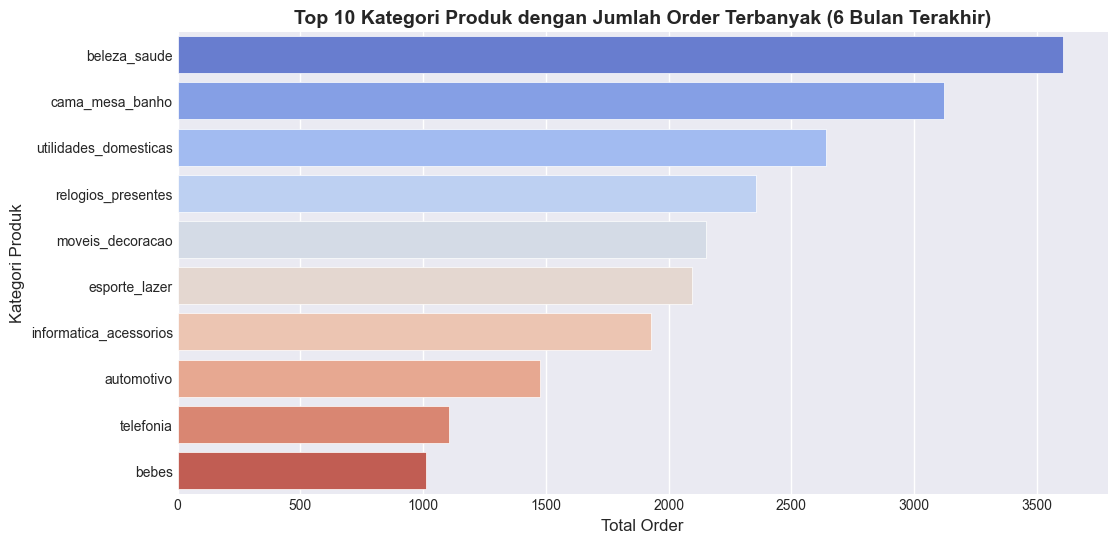

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style visualisasi
plt.style.use('seaborn-v0_8-darkgrid')

# Buat figure
plt.figure(figsize=(12, 6))

# Plot bar chart dengan hue agar warna lebih bermakna
sns.barplot(
    data=category_counts.head(10),
    x="total_orders",
    y="product_category",
    hue="product_category",  
    palette="coolwarm",
    legend=False  
)

# Tambahkan title dan label untuk konteks
plt.title("Top 10 Kategori Produk dengan Jumlah Order Terbanyak (6 Bulan Terakhir)", fontsize=14, fontweight="bold")
plt.xlabel("Total Order", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)

# Hilangkan elemen yang tidak perlu (desain minimalis)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)  # Hilangkan garis sumbu agar lebih clean

# Tampilkan visualisasi
plt.show()


### Pertanyaan 2:

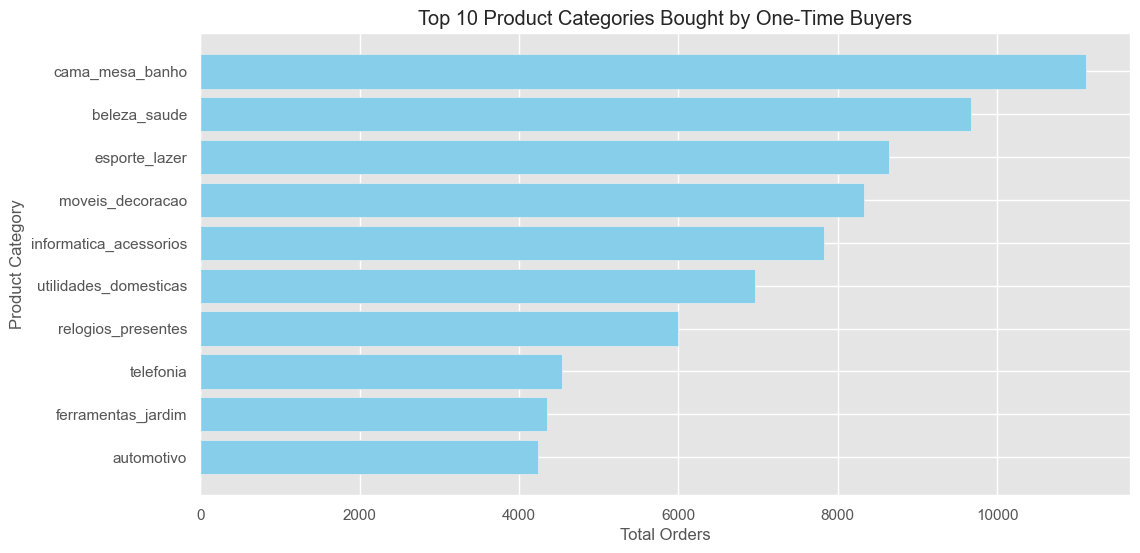

In [126]:
# Plot chart
plt.figure(figsize=(12, 6))
plt.barh(one_time_category_counts['product_category'][:10], one_time_category_counts['total_orders'][:10], color='skyblue')
plt.xlabel("Total Orders")
plt.ylabel("Product Category")
plt.title("Top 10 Product Categories Bought by One-Time Buyers")
plt.gca().invert_yaxis()  # Membalik sumbu y agar kategori dengan jumlah terbanyak di atas
plt.show()


## Pertanyaan 1: Top 10 Kategori Produk dengan Order Terbanyak dalam 6 Bulan Terakhir

1. Kategori "beleza_saude" (kecantikan & kesehatan) mendominasi penjualan dengan 3.608 order dalam 6 bulan terakhir. Ini menunjukkan bahwa produk perawatan diri, kosmetik, dan kesehatan memiliki permintaan tinggi.
   
   Rekomendasi: Bisa fokus ke promosi skincare, vitamin, atau produk kesehatan lainnya.

2. Kategori "cama_mesa_banho" (perlengkapan rumah tangga) menempati urutan kedua dengan 3.122 order, yang berarti ada tren belanja untuk kebutuhan rumah tangga.
   
   Rekomendasi: Jika menjual barang seperti sprei, selimut, atau peralatan mandi, ini bisa menjadi fokus pemasaran.

3. Kategori "informatica_acessorios" dan "automotivo" masuk dalam daftar dengan masing-masing 1.927 dan 1.476 order, menunjukkan bahwa aksesoris komputer dan otomotif masih cukup diminati.
   
   Rekomendasi: Bisa menjual produk seperti keyboard, mouse, charger, atau aksesori kendaraan.

4. Kategori "telefonia" (ponsel & aksesoris) masuk dengan 1.104 order, yang cukup signifikan meskipun bukan kategori teratas.
   
   Rekomendasi: Promosi aksesori HP seperti case, screen protector, dan kabel charger mungkin bisa meningkatkan angka penjualan.

5. Produk kategori bayi ("bebes") juga cukup tinggi dengan 1.012 order, menunjukkan bahwa kebutuhan bayi (pakaian, susu, perlengkapan mandi) masih stabil.
   
   Rekomendasi: Bisa memperkuat pemasaran produk-produk bayi dan anak.

---

## Pertanyaan 2: Kategori Produk yang Dibeli oleh One-Time Buyers

Fakta menarik:

- Kategori "cama_mesa_banho" (peralatan rumah tangga) menjadi favorit one-time buyers dengan 11.115 transaksi. Ini bisa berarti pelanggan membeli satu kali untuk kebutuhan rumah dan tidak kembali lagi.
  
  Rekomendasi: Bisa memberikan diskon untuk pembelian kedua atau mengirimkan email follow-up agar mereka tertarik membeli lagi.

- Kategori "beleza_saude" juga tinggi (9.670 transaksi), tetapi kategori ini punya potensi lebih tinggi untuk repeat buyers.
  
  Rekomendasi: Bisa membuat program loyalitas atau membership khusus untuk pelanggan kecantikan.

- Kategori "informatica_acessorios" dan "telefonia" juga banyak dibeli oleh one-time buyers.
  
  Rekomendasi: Jika pelanggan beli aksesoris HP atau komputer sekali saja, mungkin mereka belum melihat alasan untuk beli lagi. Bisa dicoba upselling atau promo bundling.

- Kategori "moveis_decoracao" (perabotan & dekorasi) cukup tinggi (8.334 transaksi).
  
  Rekomendasi: Bisa menawarkan diskon jika mereka ingin melengkapi dekorasi rumah dengan barang lain.

---

## Kesimpulan & Strategi Bisnis

- Kategori "beleza_saude" dan "cama_mesa_banho" punya demand tinggi. Bisa dimaksimalkan dengan promo atau penawaran eksklusif.
- One-time buyers cenderung membeli peralatan rumah tangga & dekorasi. Strategi retensi pelanggan harus diperkuat di kategori ini, seperti program diskon untuk pembelian berikutnya.
- Kategori teknologi seperti "informatica_acessorios" dan "telefonia" cukup diminati. Bisa ditingkatkan dengan upselling atau paket bundling.
- Strategi pemasaran yang lebih targeted bisa meningkatkan repeat buyers. Misalnya, kampanye email yang menawarkan produk pelengkap atau diskon untuk pembelian berikutnya.

---

Kalau mau analisis lebih lanjut (misalnya dari segi profit, tren harga, atau pola repeat buyers), tinggal bilang saja!

## Analisis Lanjutan (Opsional)

## Conclusion

## Pertanyaan 1
### **Tren Pembelian Pelanggan dalam 6 Bulan Terakhir**  
- Permintaan produk kesehatan & kecantikan (beleza_saude) tetap tinggi, menunjukkan tren konsumen yang semakin peduli dengan perawatan diri.  
- Kategori rumah tangga (cama_mesa_banho) dan perlengkapan domestik mendominasi, yang bisa mencerminkan peningkatan belanja untuk kenyamanan rumah.  
- Aksesoris komputer & otomotif tetap diminati, tapi tidak dominan, menunjukkan bahwa teknologi dan otomotif masih relevan tetapi bukan prioritas utama pelanggan.  
- Produk bayi masuk dalam kategori dengan permintaan tinggi, menandakan adanya segmentasi pasar yang stabil untuk kebutuhan keluarga muda.  

Kesimpulan: Tren pembelian menunjukkan bahwa pelanggan cenderung membeli produk yang berhubungan dengan kenyamanan pribadi dan rumah tangga. Kategori teknologi & otomotif masih memiliki daya tarik, tetapi tidak sebesar kategori utama seperti kecantikan dan rumah tangga.  

---
## Pertanyaan 2
### **Pola Pembelian One-Time Buyers**  
- One-time buyers cenderung membeli perlengkapan rumah tangga sekali saja, seperti sprei, selimut, dan dekorasi rumah. Ini menunjukkan bahwa pembelian bersifat kebutuhan, bukan kebiasaan berulang.  
- Kategori kecantikan & kesehatan juga tinggi di one-time buyers, tetapi ini memiliki potensi untuk repeat buyers jika strategi pemasaran lebih agresif (misalnya, promosi loyalitas atau diskon untuk pembelian kedua).  
- Aksesoris teknologi & ponsel dibeli oleh banyak one-time buyers, kemungkinan karena mereka hanya membeli saat butuh dan bukan bagian dari pola belanja rutin.  

Kesimpulan: One-time buyers lebih banyak membeli produk kebutuhan satu kali pakai, seperti dekorasi rumah dan perlengkapan tempat tidur. Namun, ada peluang untuk meningkatkan retensi pelanggan di kategori kecantikan & kesehatan dengan strategi pemasaran yang lebih terarah.  

---

## **Kesimpulan Akhir & Rekomendasi Bisnis**  
- Fokus ke kategori kecantikan & rumah tangga untuk meningkatkan penjualan.  
- Gunakan strategi retensi pelanggan untuk mengubah one-time buyers menjadi repeat buyers, terutama di kategori kecantikan.  
- Upselling dan bundling bisa meningkatkan pembelian ulang di kategori teknologi & otomotif.  
- Strategi diskon pembelian kedua atau membership loyalitas bisa memperbaiki tingkat retensi pelanggan.  

Secara keseluruhan, analisis menunjukkan bahwa produk rumah tangga dan kecantikan memiliki potensi pertumbuhan tinggi, sementara one-time buyers bisa menjadi target utama untuk program retensi pelanggan. Jika ingin eksplorasi lebih lanjut, bisa mencoba analisis repeat purchase rate atau segmentasi pelanggan.